In [54]:
import numpy as np
import pandas as pd
df=pd.read_csv('aavail_data_visualization.csv')

In [55]:
df.head()

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0
1,2,singapore,31.0,Ensley Garza,False,NaN,12.0
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0


In [56]:
df.isnull().sum(axis=0)

customer_id         0
country_name        0
age                 0
customer_name       0
is_subscriber       0
subscriber_type    72
num_streams        46
dtype: int64

In [57]:
corr=df.corr()
corr

,customer_id,age,is_subscriber,num_streams
customer_id,1.000000,-0.012852,0.037503,0.033292
age,-0.012852,1.000000,0.012524,-0.034450
is_subscriber,0.037503,0.012524,1.000000,0.136306
num_streams,0.033292,-0.034450,0.136306,1.000000


In [58]:
df['age'].describe()

count    1000.000000
mean       27.532000
std         9.120096
min        14.000000
25%        21.000000
50%        24.000000
75%        33.000000
max        57.000000
Name: age, dtype: float64

In [59]:
df['age_groups']=pd.qcut(df['age'],4,labels=['14-21','21-24','24-33','33-57'])

In [60]:
pivot_df=pd.pivot_table(df,index=['age_groups','is_subscriber','country_name'],values='num_streams')
pivot_df

num_streams
age_groups is_subscriber country_name              
14-21      False         singapore        14.239130
                         united_states    18.966667
           True          singapore        14.631579
                         united_states    19.038710
21-24      False         singapore        15.818182
                         united_states    20.896552
           True          singapore        16.772727
                         united_states    18.624113
24-33      False         singapore        14.606061
                         united_states    20.227273
           True          singapore        16.272727
                         united_states    18.910569
33-57      False         singapore        15.088889
                         united_states    18.384615
           True          singapore        15.107143
                         united_states    18.293333

In [61]:
import plotly.graph_objects as go
labels=list(df['age_groups'].unique())
fig=go.Figure(data=[
                    go.Bar(name='not subs. from Singapore',x=labels,y=df[df['is_subscriber']==False][df['country_name']=='singapore'].groupby('age_groups').mean()['num_streams']),
                    go.Bar(name='not subs. from USA',x=labels,y=df[df['is_subscriber']==False][df['country_name']=='united_states'].groupby('age_groups').mean()['num_streams']),
                    go.Bar(name='subs. from Singapore',x=labels,y=df[df['is_subscriber']==True][df['country_name']=='singapore'].groupby('age_groups').mean()['num_streams']),
                    go.Bar(name='subs. from USA',x=labels,y=df[df['is_subscriber']==True][df['country_name']=='united_states'].groupby('age_groups').mean()['num_streams'])
])
fig.update_layout(barmode='group',title='Age groups and the number of streams')
fig.show()

<ipython-input-61-fa0547d4ab52>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-61-fa0547d4ab52>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-61-fa0547d4ab52>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-61-fa0547d4ab52>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [62]:
pivot_df=pd.pivot_table(df,index=['age_groups','is_subscriber','subscriber_type'],values='num_streams')
pivot_df

num_streams
age_groups is_subscriber subscriber_type              
14-21      False         aavail_basic        16.800000
                         aavail_premium      16.371429
                         aavail_unlimited    15.818182
           True          aavail_basic        17.546667
                         aavail_premium      18.981132
                         aavail_unlimited    18.180000
21-24      False         aavail_basic        18.684211
                         aavail_premium      18.944444
                         aavail_unlimited    16.000000
           True          aavail_basic        18.485294
                         aavail_premium      17.978723
                         aavail_unlimited    19.000000
24-33      False         aavail_basic        19.125000
                         aavail_premium      17.461538
                         aavail_unlimited    14.555556
           True          aavail_basic        19.204545
                         aavail_premium      18.220000
                         aavail_unlimited    18.536585
33-57      False         aavail_basic        18.800000
                         aavail_premium      15.300000
                         aavail_unlimited    14.851852
           True          aavail_basic        17.228070
                         aavail_premium      17.824561
                         aavail_unlimited    18.481481

imputation

In [63]:
df['num_streams']=df['num_streams'].fillna(-1)

In [64]:
for i in range(len(df)):
  row=df.iloc[i]
  try:
    if row.num_streams==-1:
      imputed_v=df[df['age_groups']==row.age_groups][df['is_subscriber']==row.is_subscriber][df['subscriber_type']==row.subscriber_type]['num_streams'].mean()
      imputed_v=round(imputed_v)
      df.loc[i,'num_streams']=imputed_v
  except:
    continue

<ipython-input-64-cdf8596c6c2d>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-64-cdf8596c6c2d>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-64-cdf8596c6c2d>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-64-cdf8596c6c2d>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-64-cdf8596c6c2d>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-64-cdf8596c6c2d>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-64-cdf8596c6c2d>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-64-cdf8596c6c2d>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-64-cdf8596c6c2d>:5: UserWarning:

Boolean Series key will be reindexed to match D

In [65]:
df.head()

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams,age_groups
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0,14-21
1,2,singapore,31.0,Ensley Garza,False,NaN,12.0,24-33
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0,21-24
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0,14-21
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0,21-24


In [66]:
df=pd.get_dummies(df,columns=['country_name'],drop_first=True)

In [67]:
df.drop(['customer_id','customer_name'],axis=1,inplace=True)

In [68]:
df['age_groups']=df['age_groups'].map({'14-21':1,'21-24':2,'24-33':3,'33-57':4})

In [69]:
df['is_subscriber']=df['is_subscriber'].map({True:1,False:0})

In [70]:
df.drop(['age'],axis=1,inplace=True)

In [71]:
df.head()

,is_subscriber,subscriber_type,num_streams,age_groups,country_name_united_states
0,1,aavail_premium,23.0,1,1
1,0,NaN,12.0,3,0
2,0,aavail_premium,22.0,2,1
3,1,aavail_basic,19.0,1,1
4,1,aavail_premium,23.0,2,0


In [72]:
df[['age_groups','num_streams','country_name_united_states']]=df[['age_groups','num_streams','country_name_united_states']].astype(int)

In [73]:
df['subscriber_type'].value_counts()

aavail_basic        339
aavail_premium      313
aavail_unlimited    276
Name: subscriber_type, dtype: int64

In [74]:
training_data=df[~df['subscriber_type'].isnull()]
test_data=df[df['subscriber_type'].isnull()].drop(['subscriber_type'],axis=1)
x_train=training_data.drop(['subscriber_type'],axis=1)
y_train=pd.get_dummies(training_data['subscriber_type'])

In [75]:
x_train=x_train.values
y_train=y_train.values
test_data=test_data.values

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

model=SVC(probability=True,random_state=30)
clf=OneVsRestClassifier(model)
clf.fit(x_train,y_train)

OneVsRestClassifier(estimator=SVC(probability=True, random_state=30))

In [77]:
y_hat=clf.predict_proba(x_train)
y_hat=np.argmax(y_hat,axis=1)

In [78]:
y_hat_new=[]
for value in y_hat:
  if value==0:
    y_hat_new.append([1,0,0])
  elif value==1:
    y_hat_new.append([0,1,0])
  elif value==2:
    y_hat_new.append([0,0,1])
  else:
    pass
y_hat_new=np.array(y_hat_new)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_hat_new)

0.4040948275862069

In [80]:
test_y=clf.predict_proba(test_data)
test_y=np.argmax(test_y,axis=1)

In [81]:
nan_y=[]
for y in test_y:
  if y==0:
    nan_y.append('aavail_basic')
  elif y==1:
    nan_y.append('aavail_premium')
  elif y==2:
    nan_y.append('aavail_unlimited')
  else:
    pass

In [82]:
indexes=list(df[df['subscriber_type'].isnull()].index)

In [83]:
df.loc[indexes,'subscriber_type']=nan_y

In [84]:
df.head()

,is_subscriber,subscriber_type,num_streams,age_groups,country_name_united_states
0,1,aavail_premium,23,1,1
1,0,aavail_premium,12,3,0
2,0,aavail_premium,22,2,1
3,1,aavail_basic,19,1,1
4,1,aavail_premium,23,2,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   is_subscriber               1000 non-null   int64 
 1   subscriber_type             1000 non-null   object
 2   num_streams                 1000 non-null   int32 
 3   age_groups                  1000 non-null   int32 
 4   country_name_united_states  1000 non-null   int32 
dtypes: int32(3), int64(1), object(1)
memory usage: 27.5+ KB


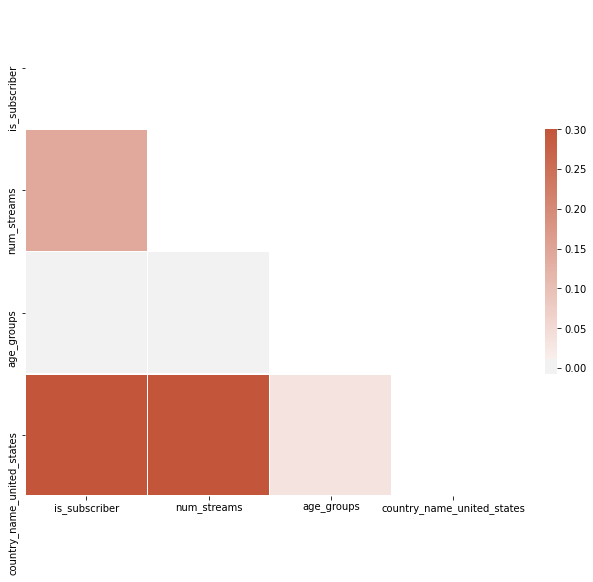

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [87]:
df['age_groups']=df['age_groups'].map({1:'14-21',2:'21-24',3:'24-33',4:'33-57'})
df['country_name']=df['country_name_united_states'].map({0:'Singapore',1:'USA'})

In [88]:
df.drop(['country_name_united_states'],axis=1,inplace=True)

In [89]:
import plotly.express as px
fig=px.bar(df,x='subscriber_type',y='num_streams',title='Total number of streams per subscriber type')
fig.show()

In [90]:
df.groupby('subscriber_type')['num_streams'].mean()

subscriber_type
aavail_basic        18.058081
aavail_premium      17.749226
aavail_unlimited    17.202847
Name: num_streams, dtype: float64

In [91]:
fig=px.bar(df,x='country_name',y='is_subscriber',title='number of subscribers in each country')

fig.show()

In [92]:
fig=px.bar(df,x='country_name',y='is_subscriber',color='age_groups',barmode='group',title='Number of subscribers separated by each age group for each country')
fig.show()

In [93]:
fig=px.bar(df,x='age_groups',y='is_subscriber',color='subscriber_type',barmode='group',title='The number of subscribers per subscriber type in each age group')
fig.show()